In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = pd.read_csv ("../datasets/temperatura_e_potencia2.csv", header=0)
raw.head()

,momento,pa,temp_celsius,pressao
0,2019-02-18 00:00:00-03,20.377751,24,1013.0
1,2019-02-18 01:00:00-03,20.274133,24,1012.6
2,2019-02-18 02:00:00-03,20.112670,24,1012.3
3,2019-02-18 03:00:00-03,20.260007,23,1011.8
4,2019-02-18 04:00:00-03,20.181787,23,1011.3


# Data cleaning

In [3]:
processed = raw.dropna()
processed = processed.set_index(pd.to_datetime (processed['momento'])).drop('momento', axis=1)
processed = processed[processed['pa']<500]
processed = processed[processed['pa']>10]

In [4]:
## Remove fins de semana
# Create an index of just the date portion of your index (this is the slow step)
dfDays = pd.to_datetime(processed.index.date)

# Create a range of business days over that period
dfBdays = pd.bdate_range(start=processed.index[0].date(), end=processed.index[-1].date())

#Filter the series to just those days contained in the business day range.
filtered = processed[dfDays.isin(dfBdays)]

In [5]:
## Removendo dias não-letivos ou com erros
# março 4,5,6
# abril 8, 15, 16,17,18,19, 22, 25, 29
# maio 1, 9, 10, 14, 15, 16, 17
# junho 20, 21
filtered = filtered[~((filtered.index.month == 3) & (filtered.index.day == 4))]
filtered = filtered[~((filtered.index.month == 3) & (filtered.index.day == 5))]
filtered = filtered[~((filtered.index.month == 3) & (filtered.index.day == 6))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 8))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 4))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 15))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 16))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 17))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 18))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 19))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 22))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 25))]
filtered = filtered[~((filtered.index.month == 4) & (filtered.index.day == 29))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 1))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 9))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 10))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 14))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 15))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 16))]
filtered = filtered[~((filtered.index.month == 5) & (filtered.index.day == 17))]
filtered = filtered[~((filtered.index.month == 6) & (filtered.index.day == 20))]
filtered = filtered[~((filtered.index.month == 6) & (filtered.index.day == 21))]

In [6]:
filtered = filtered.between_time('14:00:00', '17:00:00')

# Spline algorithm

In [63]:
from scipy.interpolate import SmoothBivariateSpline
model2 = SmoothBivariateSpline (x=X_train['temp_celsius'], y=X_train['pressao'], z=y_train, kx=2, ky=2)



/home/benitez/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:1051: UserWarning: ier=591
  warnings.warn(message)


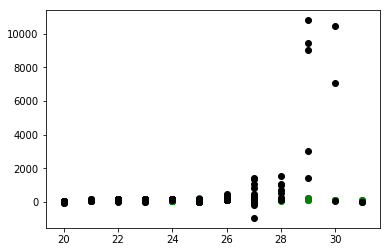

In [66]:
y_hat2 = model2(x=X_train['temp_celsius'], y=X_train['pressao'], grid=False)
plt.scatter(X_train['temp_celsius'], y_train,color='g')
plt.scatter(X_train['temp_celsius'], y_hat2,color='k')

plt.show()

In [69]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.sin(x)

cs = CubicSpline(X_train['temp_celsius'], y_train)#, bc_type='natural'extrapolate=True)
#xs = np.arange(-0.5, 9.6, 0.1)

plt.figure(figsize=(6.5, 4))
plt.plot(X_train['temp_celsius'], y_train, 'o', label='data')
plt.plot(X_test['temp_celsius'], cs(X_test['temp_celsius']), label="S")



ValueError: `x` must be strictly increasing sequence.

In [10]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
#xx, yy = np.meshgrid(x, y)
z = np.sin(x+y)
z

array([ 0.56069262,  0.0950782 , -0.39381467, -0.78628799, -0.98625057,
       -0.94474463, -0.67193225, -0.23460742,  0.26015749,  0.69122677,
        0.95305963,  0.98155025,  0.76972314,  0.36944096, -0.12129326,
       -0.58233065, -0.90079319, -0.99871014, -0.85210802, -0.49688014,
       -0.01999867,  0.46177918,  0.83049737,  0.99588084,  0.91743796,
        0.61437426,  0.16089031, -0.33198519, -0.74357914, -0.97311898,
       -0.96440536, -0.71957167, -0.29856174,  0.19554652,  0.64177817,
        0.93088014,  0.99207019,  0.81036686,  0.43025745, -0.05519398,
       -0.527132  ])

ValueError: x and y must be the same size

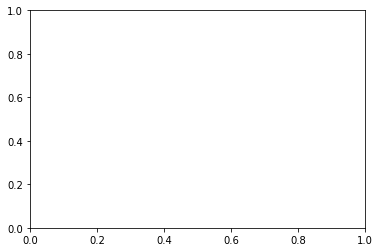

In [15]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
#xx, yy = np.meshgrid(x, y)
z = np.sin(x+y)
f = interpolate.interp2d(x, y, z, kind='linear')

import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.scatter(xnew, znew)


# Interpretation